# Import libraries and modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Constants

In [ ]:
DBNAMES = ["SPRING", "ANSURII", "ANSURI"]
GENDERS = ["female", "male"]

DATA_DIR = f"/content/gdrive/MyDrive/SilhouettesNN_"
SAVE_DIR = f"/content/gdrive/MyDrive/BodyMeasurementsDB"

MEASUREMENTS = ['weight_kg',
                'stature_cm',
                'neck_base_girth',
                'chest_girth',
                'waist_girth',
                'hips_buttock_girth',
                'shoulder_girth',
                'thigh_girth',
                'thigh_low_girth',
                'calf_girth',
                'ankle_girth',
                'forearm_girth',
                'wrist_girth',
                'shoulder_length',
                'sleeveoutseam_length',
                'forearm_length',
                'crotchheight_length',
                'waistback_length',
                'thigh_length',
                'chest_depth_length',
                'head_girth']

MAIN_MEAS = [ 'weight_kg',
              'stature_cm',
              'chest_girth',
              'waist_girth',
              'hips_buttock_girth',
              'shoulder_girth',
              'thigh_girth',
              'calf_girth',
              'forearm_girth',
              'shoulder_length',
              'sleeveoutseam_length',
              'crotchheight_length',
              'thigh_length']

PERFIT_MEAS = ['weight_kg',
               'stature_cm',
               'chest_girth',
               'waist_girth',
               'hips_buttock_girth']

## Load dataframe
file_encoding = "ISO-8859-1"    # 'utf8'

MEAS = PERFIT_MEAS ##
NUM_CLUST = 10
QUANTS = [0.2, 0.5, 0.8]

# plt.style.use("ggplot")
# plt.style.use("seaborn-paper")
# plt.style.use("default")
plt.style.use("seaborn-colorblind")

# Load/Preprocess/Save data

## Load data

SPRING DB 2023

In [ ]:
db_dir = f"{DATA_DIR}SPRING2023/silhouettes_DB_SPRING2023_female.csv"
df_spring_female = pd.read_csv(db_dir, encoding = file_encoding, converters={'ID': str})
df_spring_female = df_spring_female.drop(["bodyID"], axis=1)
# df_spring_female.describe()

In [ ]:
db_dir = f"{DATA_DIR}SPRING2023/silhouettes_DB_SPRING2023_male.csv"
df_spring_male = pd.read_csv(db_dir, encoding = file_encoding, converters={'ID': str})
df_spring_male = df_spring_male.drop(["bodyID"], axis=1)
# df_spring_male.describe()

ANSUR II DB 2023

In [ ]:
db_dir = f"{DATA_DIR}ANSURII2023/silhouettes_DB_ANSURII2023_female.csv"
df_ansurii_female = pd.read_csv(db_dir, encoding = file_encoding, converters={'ID': str})
# df_ansurii_female.describe()

In [ ]:
db_dir = f"{DATA_DIR}ANSURII2023/silhouettes_DB_ANSURII2023_male.csv"
df_ansurii_male = pd.read_csv(db_dir, encoding = file_encoding, converters={'ID': str})
# df_ansurii_male.describe()

In [ ]:
#df_ansurii_female.isna().any()

ANSUR I DB 2023

In [ ]:
db_dir = f"{DATA_DIR}ANSURI2023/silhouettes_DB_ANSURI2023_female.csv"
df_ansuri_female = pd.read_csv(db_dir, encoding = file_encoding, converters={'ID': str})
# df_ansuri_female.describe()

In [ ]:
db_dir = f"{DATA_DIR}ANSURI2023/silhouettes_DB_ANSURI2023_male.csv"
df_ansuri_male = pd.read_csv(db_dir, encoding = file_encoding, converters={'ID': str})
# df_ansuri_male.describe()

## Process data

Prepare and Concatenate tables

In [ ]:
for dbname in DBNAMES:
  for gender in GENDERS:
    try:
      eval(f'df_{dbname.lower()}_{gender}.insert(0, "database", "{dbname}")')
      eval(f'df_{dbname.lower()}_{gender}.insert(1, "gender", "{gender}")')
    except ValueError:
      print(f'Cannot insert column "gender" and/or "database" because it already exists')

In [ ]:
# Concatenate - by rows
# df = pd.concat([df_spring23_female, df_spring23_male, df_ansurii_female, df_ansurii_male, df_ansuri_female, df_ansuri_male], axis=0, ignore_index=True)
df = pd.concat([df_spring_female, df_spring_male, df_ansurii_female, df_ansurii_male, df_ansuri_female, df_ansuri_male], axis=0, ignore_index=True)

# Shuffle the DataFrame rows & return all rows (frac = 1)
df = df.sample(frac = 1).reset_index(drop=True)
df

,database,gender,weight_kg,stature_cm,neck_base_girth,chest_girth,waist_girth,hips_buttock_girth,shoulder_girth,thigh_girth,...,forearm_girth,wrist_girth,shoulder_length,sleeveoutseam_length,forearm_length,crotchheight_length,waistback_length,thigh_length,chest_depth_length,head_girth
0,ANSURII,male,80.40,174.50,42.10,102.40,91.10,99.60,114.70,62.40,...,29.90,18.00,15.10,61.10,28.40,84.60,47.00,44.30,24.80,57.60
1,ANSURI,female,65.70,154.70,35.00,99.20,83.30,100.10,103.30,62.30,...,26.50,15.20,14.50,52.20,23.00,71.30,34.30,37.20,26.30,55.80
2,ANSURII,female,66.30,160.30,38.20,98.20,88.00,99.00,103.40,57.70,...,24.90,16.60,14.30,53.20,23.60,74.00,41.20,35.10,26.50,55.40
3,SPRING,female,75.07,166.91,36.48,92.09,82.40,108.68,99.44,67.75,...,26.90,14.70,12.55,54.96,23.57,77.92,43.73,38.30,24.48,57.51
4,ANSURI,male,84.20,186.90,43.40,98.60,83.80,103.50,118.80,63.50,...,33.50,18.20,15.00,63.50,27.80,90.90,44.30,44.30,24.40,55.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13093,SPRING,male,79.05,175.14,40.77,101.20,88.56,100.95,115.62,61.66,...,29.47,17.82,16.02,56.07,27.53,78.61,49.39,40.33,23.11,58.36
13094,ANSURII,male,101.70,186.50,46.10,114.30,96.20,108.20,122.00,68.50,...,35.00,18.90,14.40,61.80,27.90,89.50,47.70,43.10,27.80,56.30
13095,ANSURII,male,89.80,180.00,47.20,111.70,100.10,104.10,120.80,61.40,...,32.20,17.50,14.20,57.40,25.60,83.00,51.20,41.20,27.30,57.70
13096,ANSURII,male,98.50,185.60,43.80,110.90,96.40,109.70,125.40,66.10,...,33.10,18.20,15.10,62.40,28.10,88.80,48.10,41.90,26.00,59.70


In [ ]:
df[df["gender"] == "female"].describe()

,weight_kg,stature_cm,neck_base_girth,chest_girth,waist_girth,hips_buttock_girth,shoulder_girth,thigh_girth,thigh_low_girth,calf_girth,...,forearm_girth,wrist_girth,shoulder_length,sleeveoutseam_length,forearm_length,crotchheight_length,waistback_length,thigh_length,chest_depth_length,head_girth
count,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,...,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000
mean,66.114997,162.869879,36.195004,93.249548,82.591212,99.837542,102.959848,60.148066,39.286407,36.289682,...,26.028769,15.341546,14.038176,54.259415,24.071322,77.810856,40.045425,38.691607,24.621263,55.552442
std,13.074705,6.554508,2.545192,9.344329,10.890451,9.021817,5.992393,6.067924,3.784026,3.083593,...,1.977689,0.903902,1.108463,3.011250,1.554080,4.662077,3.726622,2.707515,2.978846,1.969977
min,35.800000,140.900000,29.800000,69.500000,59.470000,78.700000,85.200000,42.560000,30.200000,24.860000,...,15.670000,12.400000,10.700000,41.000000,15.700000,58.240000,28.300000,29.120000,17.000000,45.910000
25%,57.800000,158.440000,34.500000,87.000000,74.700000,93.890000,98.970000,56.100000,36.800000,34.250000,...,24.700000,14.740000,13.300000,52.200000,23.000000,74.700000,37.200000,36.900000,22.600000,54.200000
50%,64.100000,162.700000,36.000000,91.700000,80.900000,98.700000,102.500000,59.500000,38.800000,36.000000,...,25.810000,15.300000,14.000000,54.100000,24.000000,77.650000,40.200000,38.700000,24.200000,55.400000
75%,71.600000,167.200000,37.600000,97.900000,88.300000,104.200000,106.200000,63.400000,41.200000,37.900000,...,27.100000,15.800000,14.800000,56.240000,25.040000,80.810000,42.710000,40.500000,26.100000,56.630000
max,184.300000,189.050000,58.250000,158.300000,151.000000,177.320000,140.590000,105.500000,64.620000,60.860000,...,36.660000,20.890000,18.200000,67.800000,31.200000,109.280000,53.200000,50.400000,45.480000,68.580000


Correlations

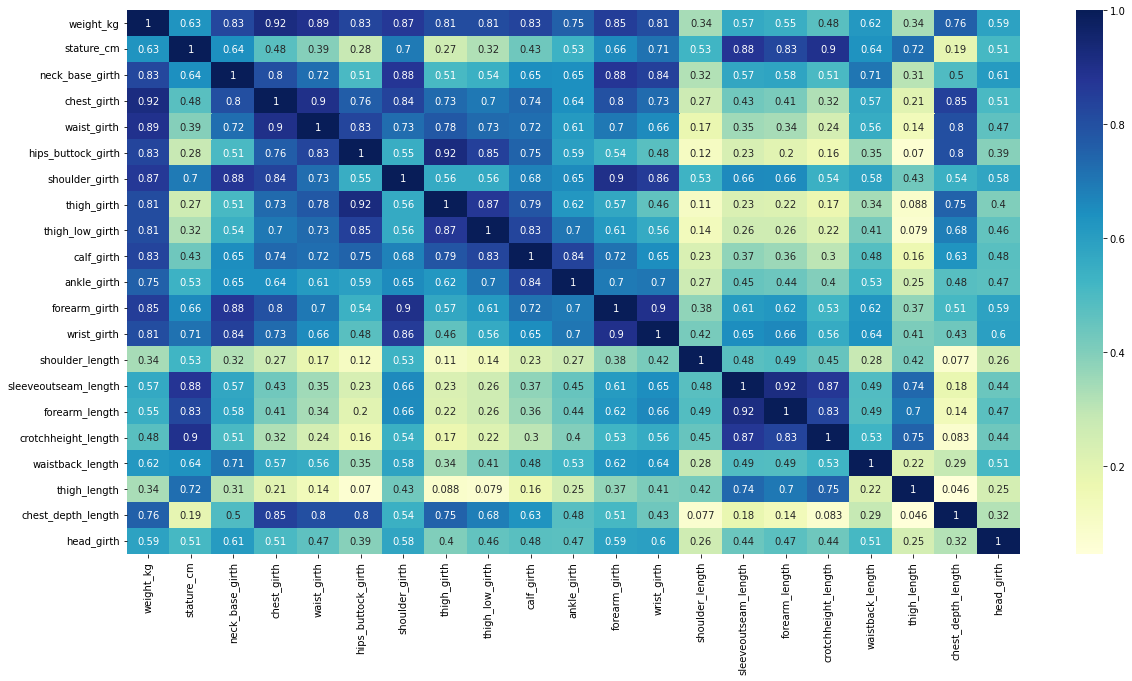

In [ ]:
import seaborn as sns

plt.figure(figsize = (20,10))
ax = sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

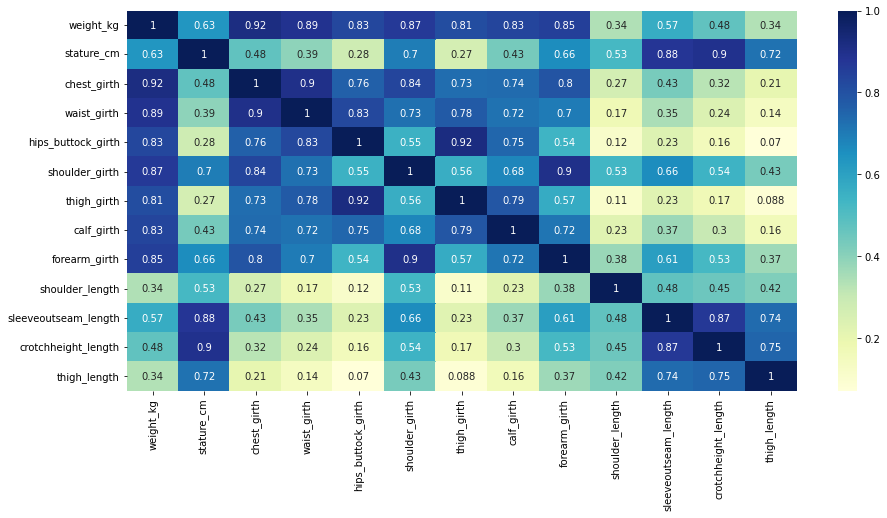

In [ ]:
plt.figure(figsize = (15,7))
ax = sns.heatmap(df[MAIN_MEAS].corr(), cmap='YlGnBu', annot=True)

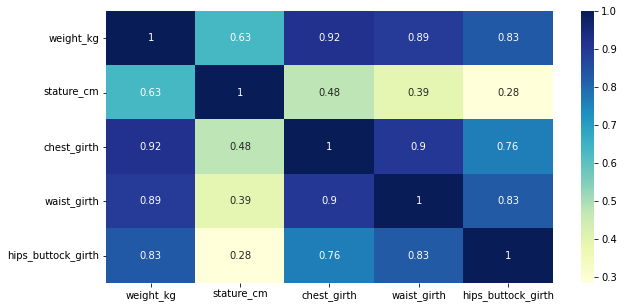

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.heatmap(df[PERFIT_MEAS].corr(), cmap='YlGnBu', annot=True)

Histograms

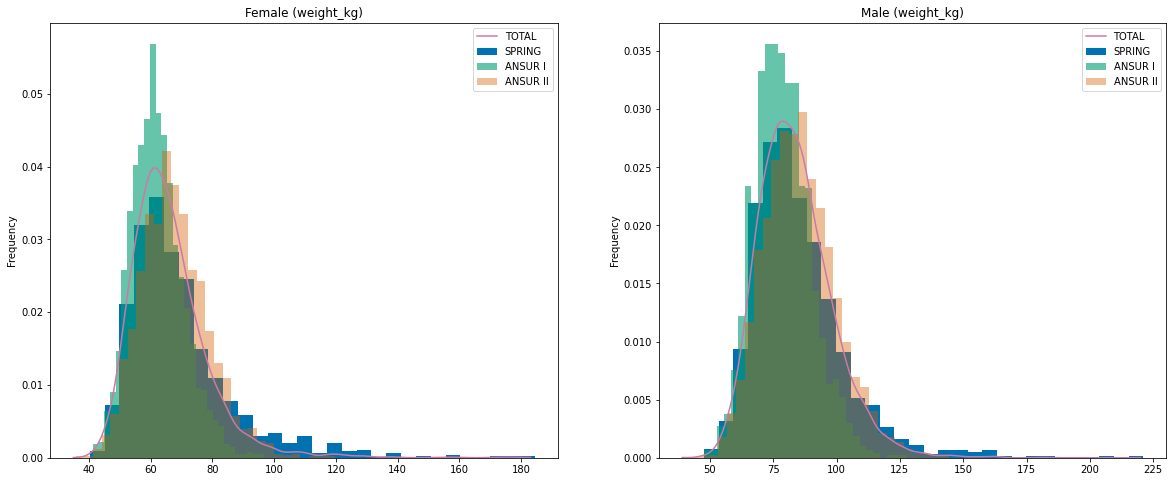

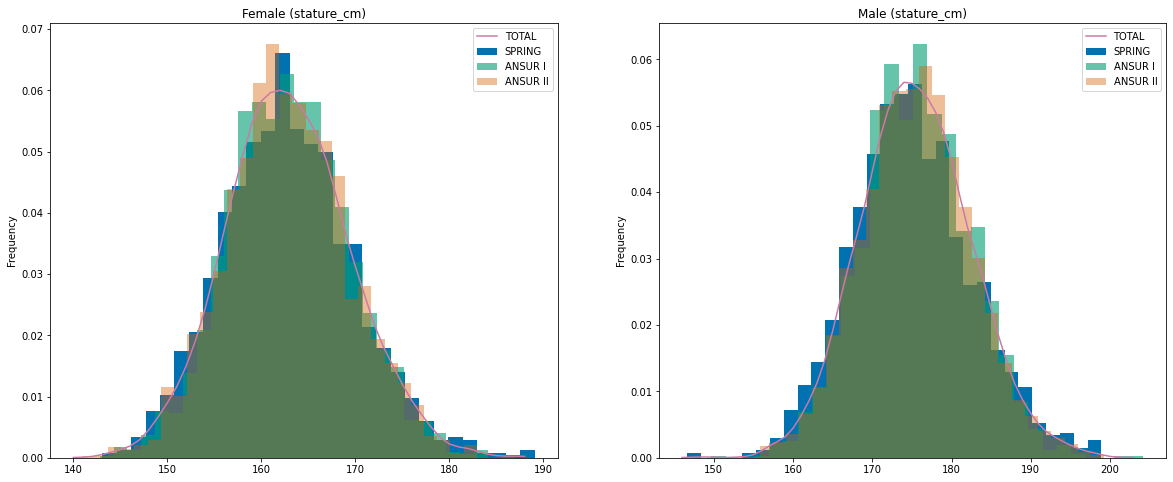

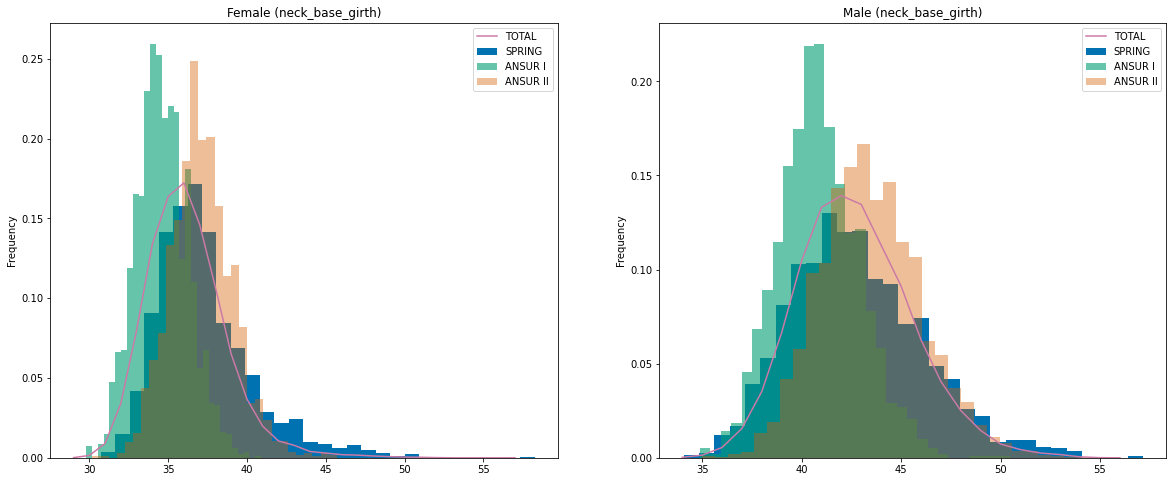

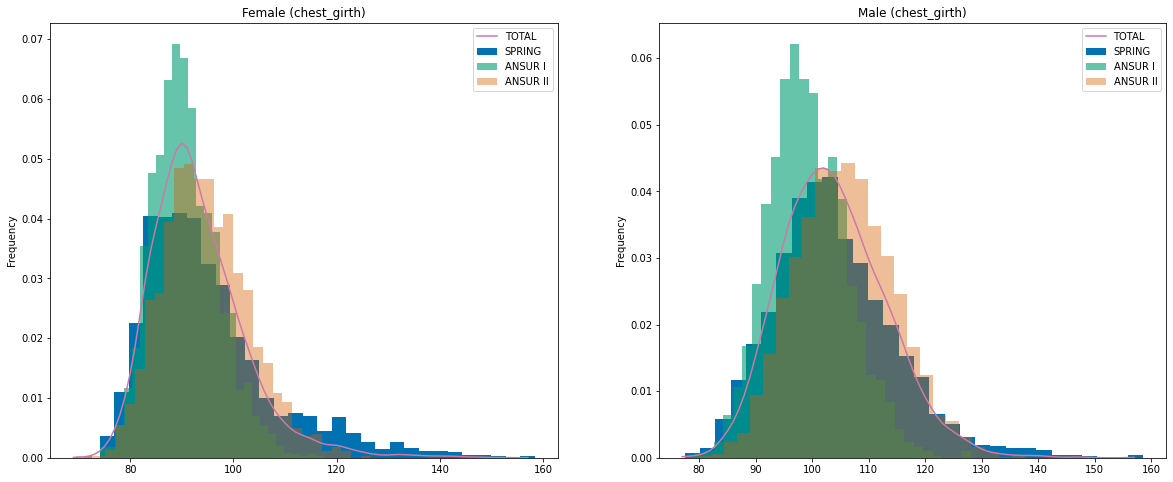

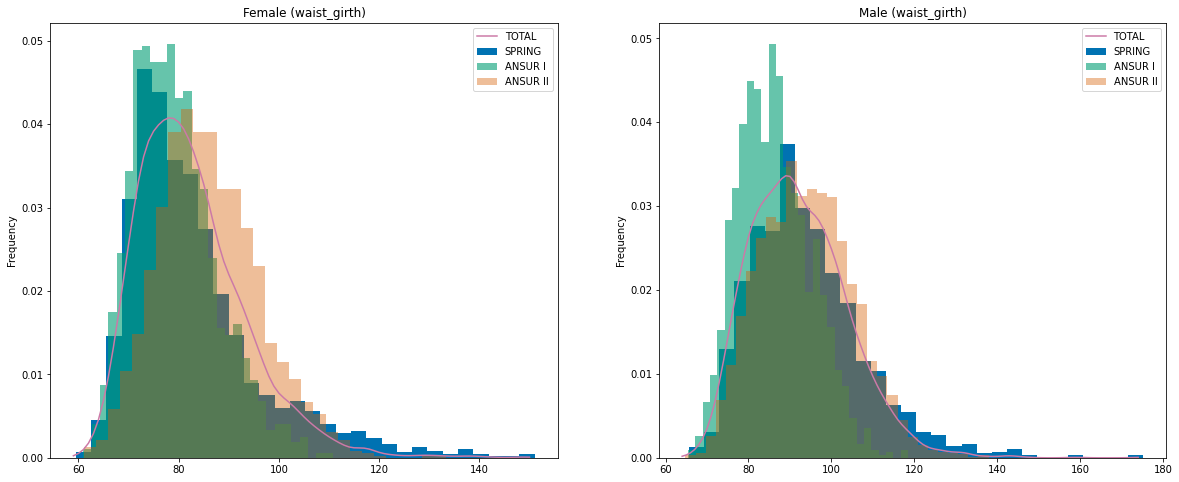

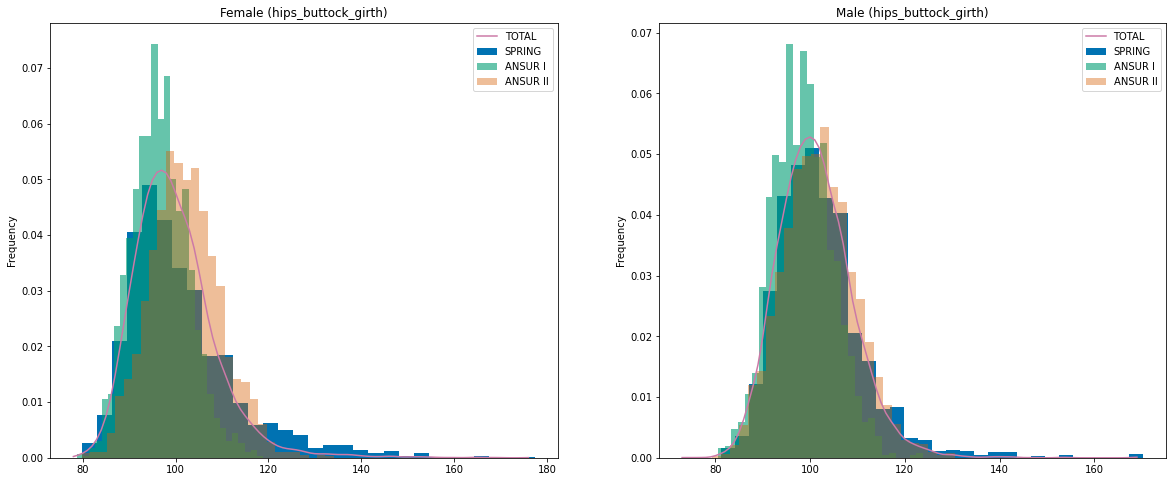

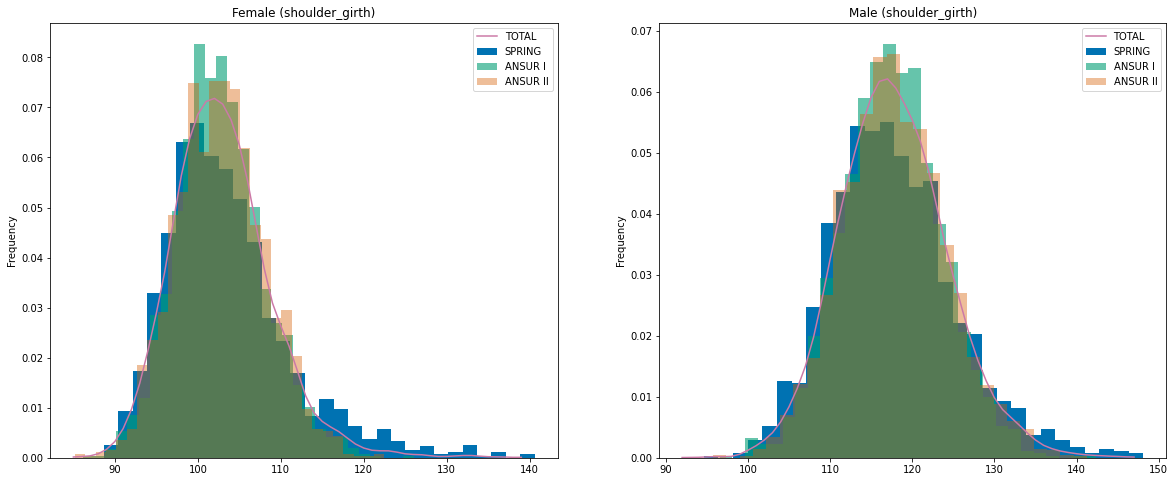

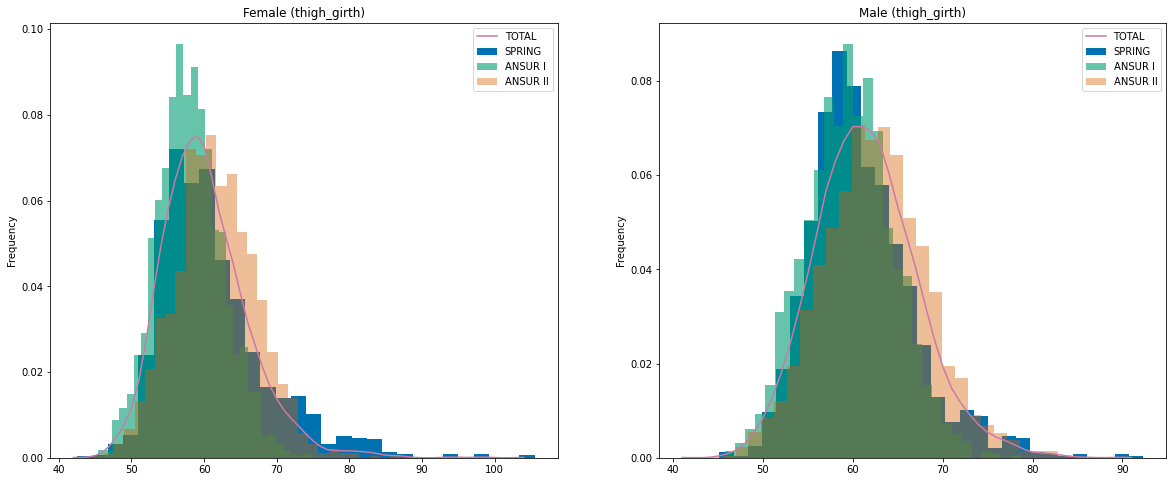

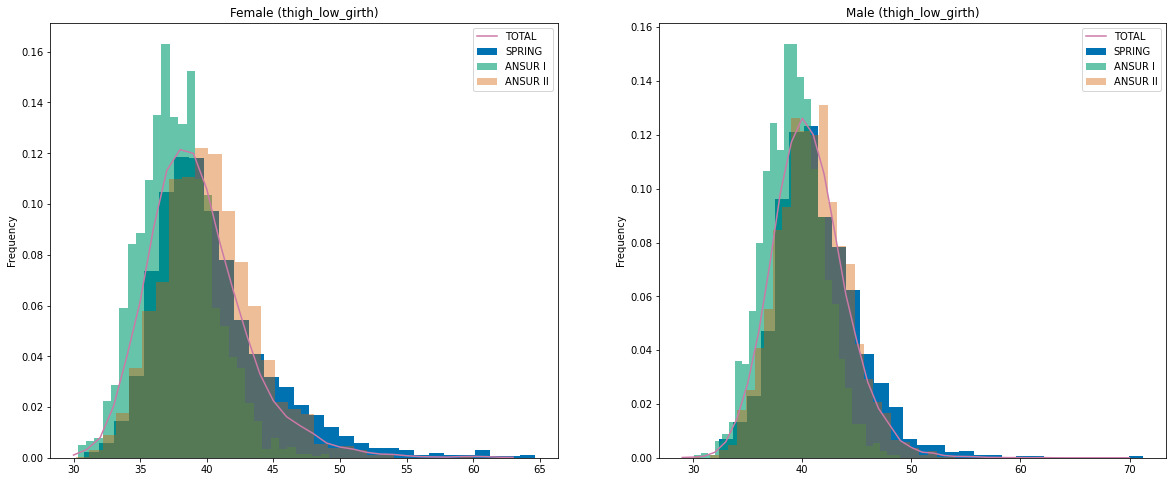

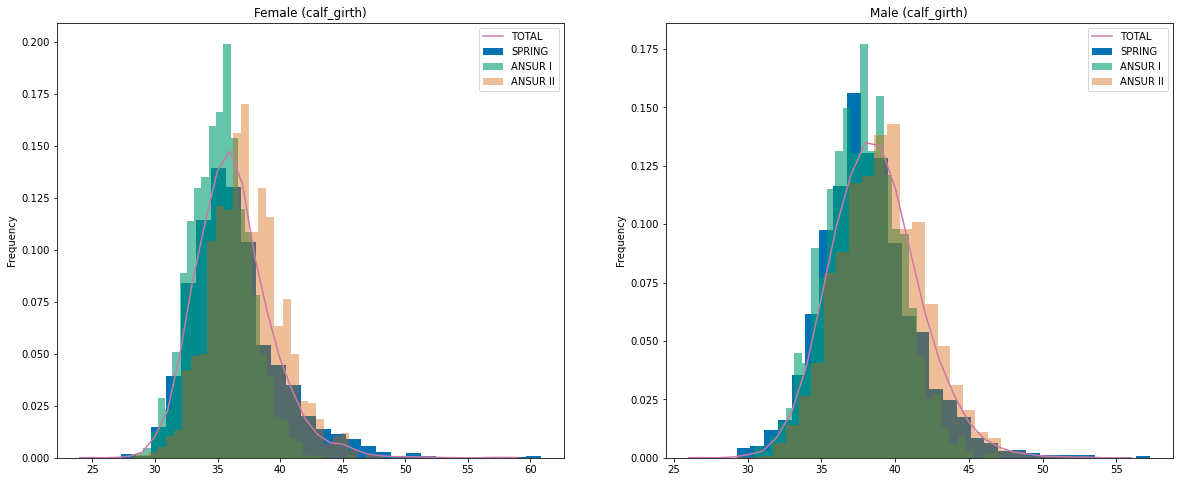

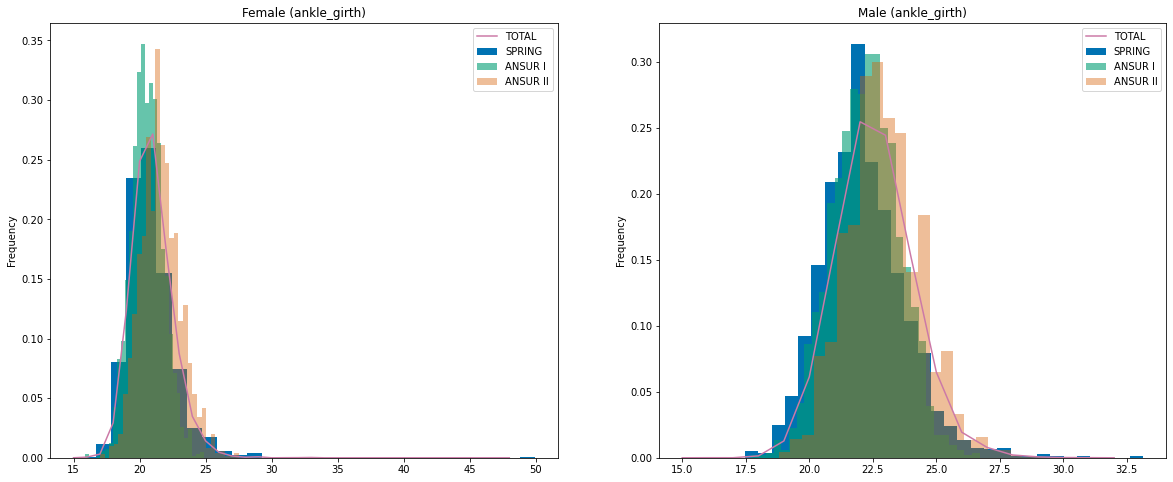

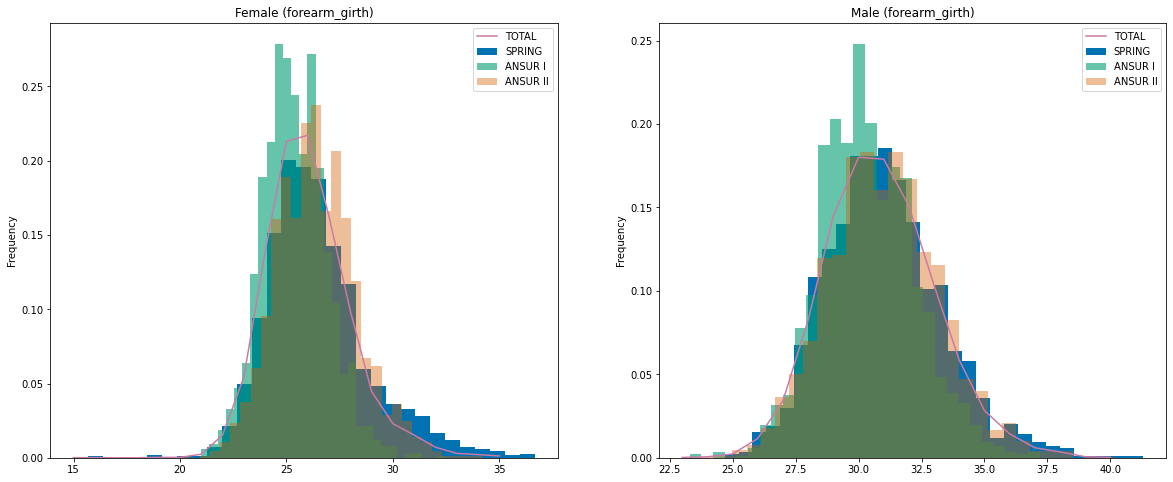

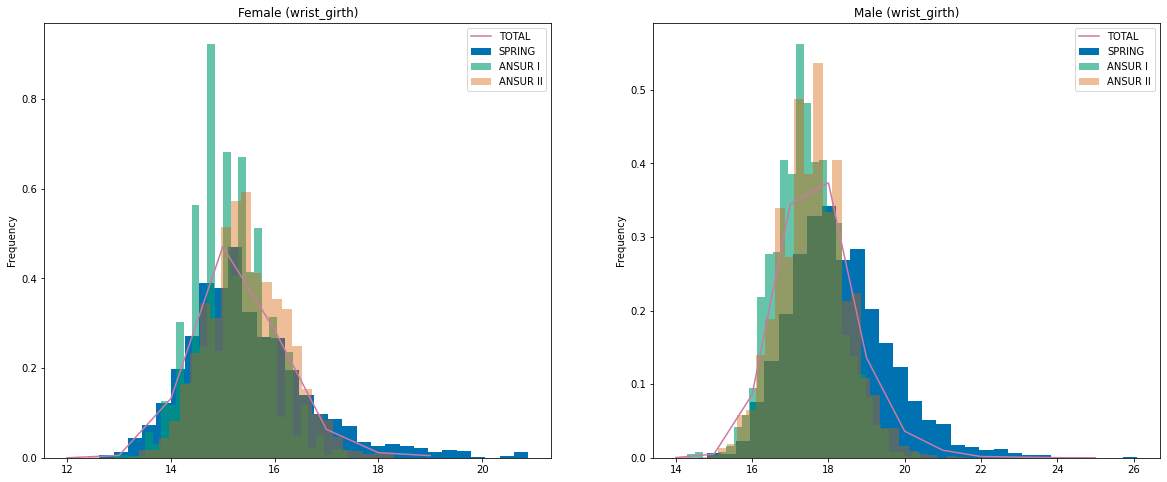

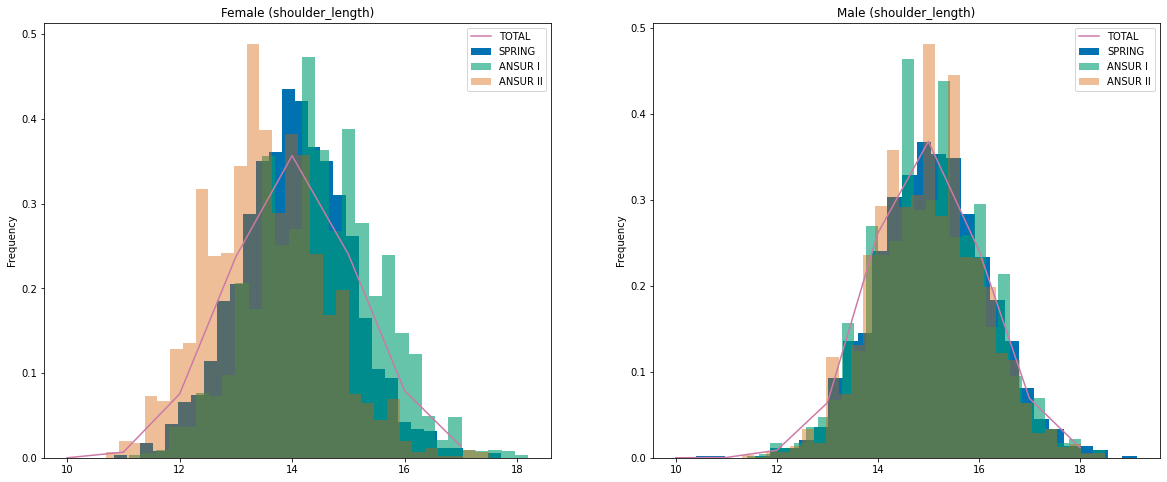

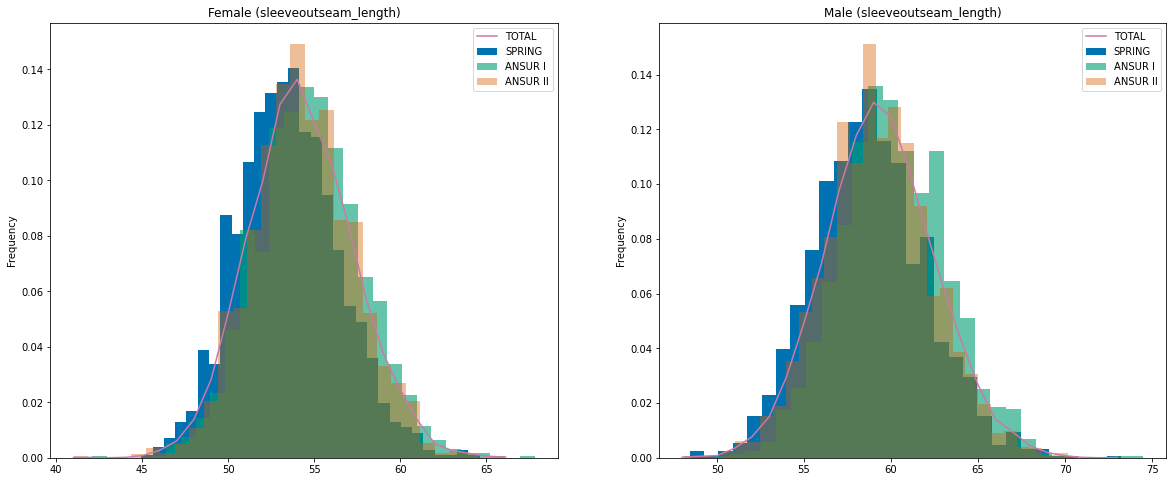

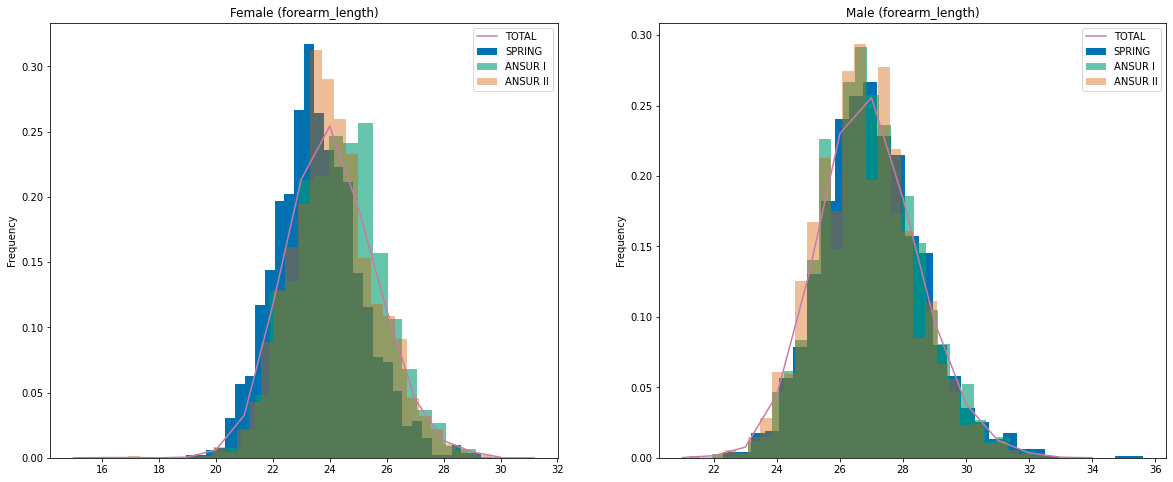

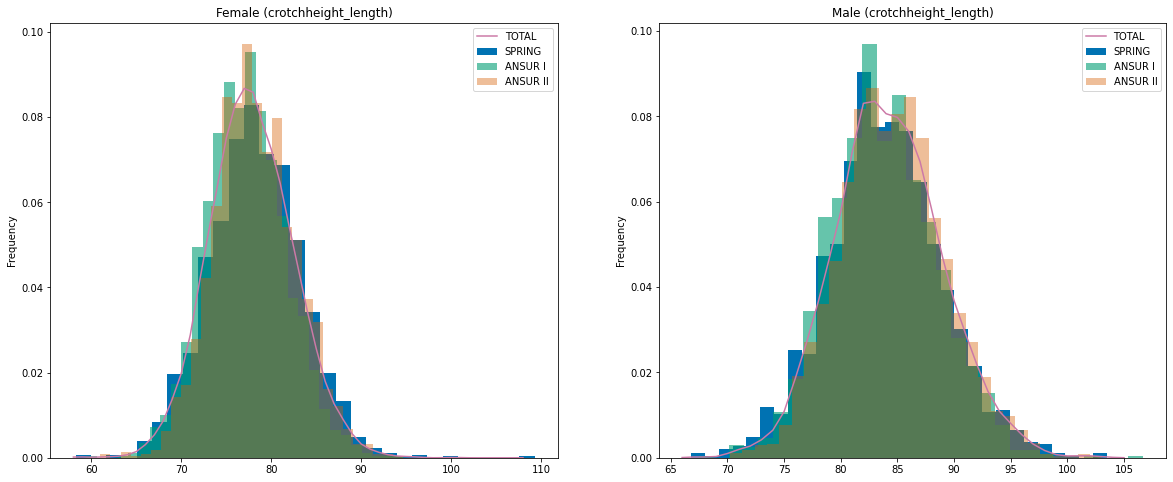

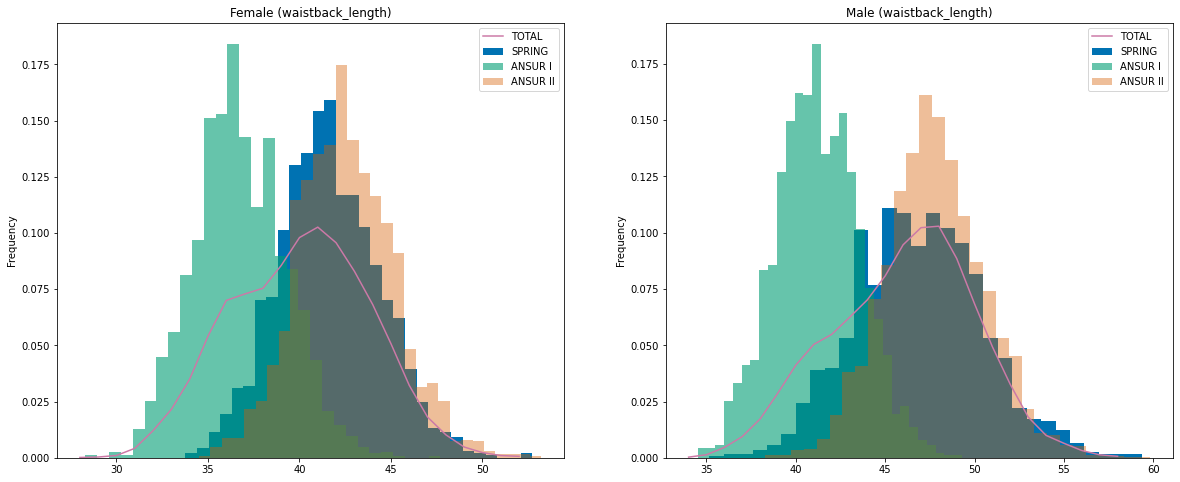

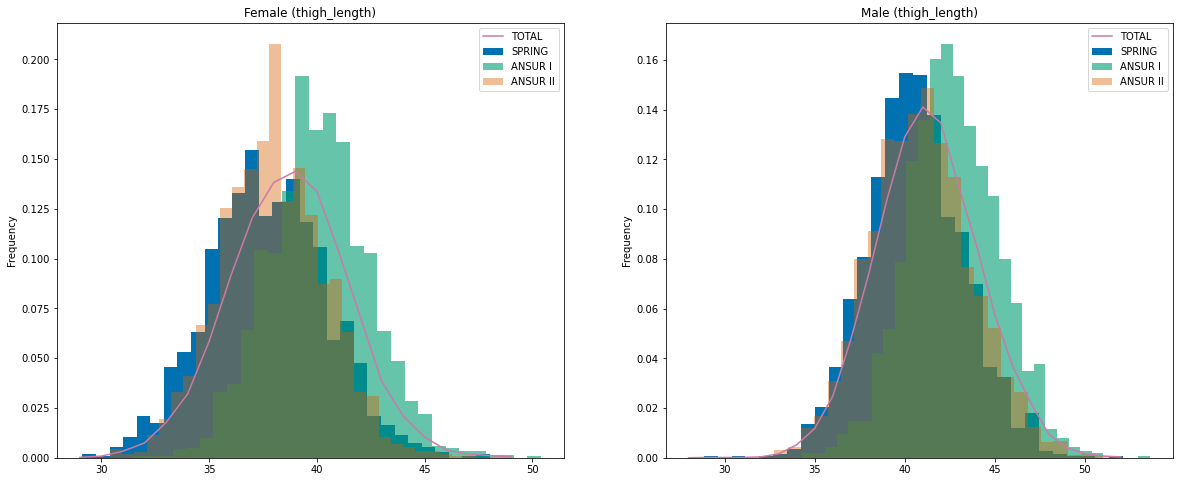

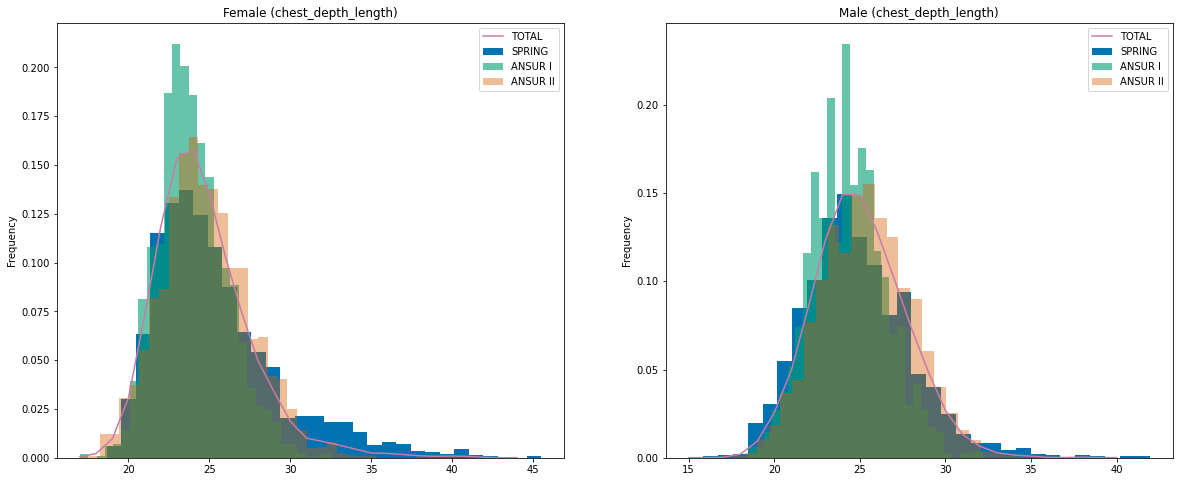

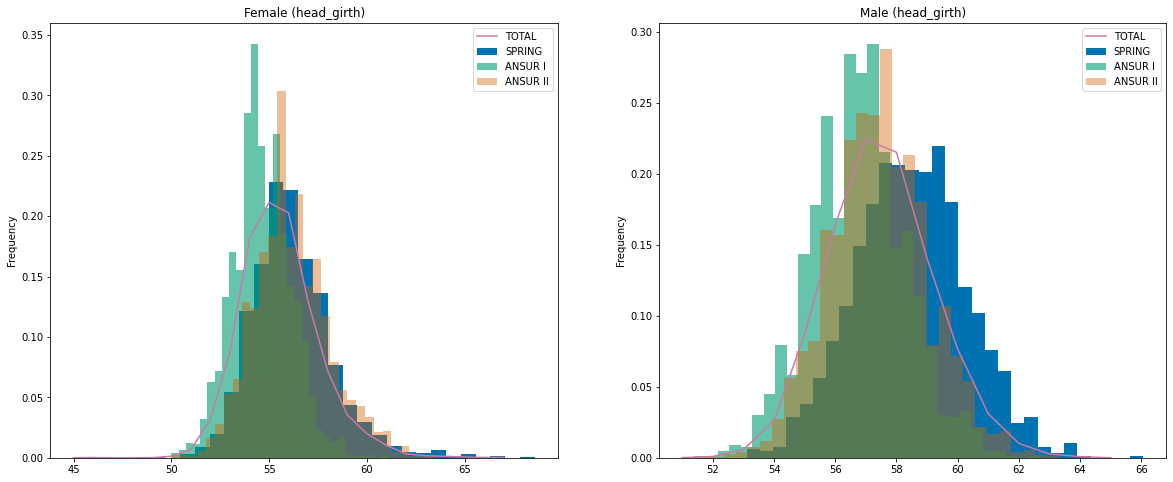

In [ ]:
BINS = 30

for meas in MEASUREMENTS:   #MEASUREMENTS:  MAIN_MEAS   PERFIT_MEAS

  plt.figure(figsize=(20,8))

  for g, gender in enumerate(GENDERS):
    plt.subplot(1, 2, g+1)

    if gender == "female":

        min = int(df[df["gender"] == gender][meas].min())
        max = int(df[df["gender"] == gender][meas].max())
        ind = [i for i in range(min, max, 1)]

        ## Plot histogram
        df_spring_female[meas].plot(kind = "hist", bins=BINS, alpha=1.0, density=True) # change density to true, because KDE uses density
        df_ansuri_female[meas].plot(kind = "hist", bins=BINS, alpha=0.6, density=True) # change density to true, because KDE uses density
        df_ansurii_female[meas].plot(kind = "hist", bins=BINS, alpha=0.4, density=True) # change density to true, because KDE uses density

        # Plot KDE
        df[df["gender"] == gender][meas].plot(kind = "kde", ind=ind)


    elif gender == "male":
        min = int(df[df["gender"] == gender][meas].min())
        max = int(df[df["gender"] == gender][meas].max())
        ind = [i for i in range(min, max, 1)]

        ## Plot histogram
        df_spring_male[meas].hist(bins=BINS, alpha=1.0, density=True)
        df_ansuri_male[meas].hist(bins=BINS, alpha=0.6, density=True)
        df_ansurii_male[meas].hist(bins=BINS, alpha=0.4, density=True)

        # Plot KDE
        df[df["gender"] == gender][meas].plot(kind = "kde", ind=ind)

    plt.ylabel("Frequency")
    plt.title(f"{gender.capitalize()} ({meas})")
    plt.legend([ "TOTAL", "SPRING", "ANSUR I", "ANSUR II"])

  plt.show()


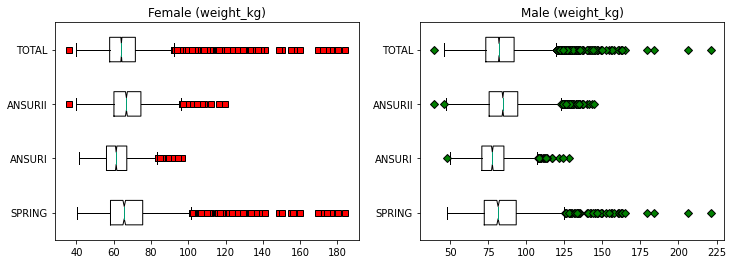

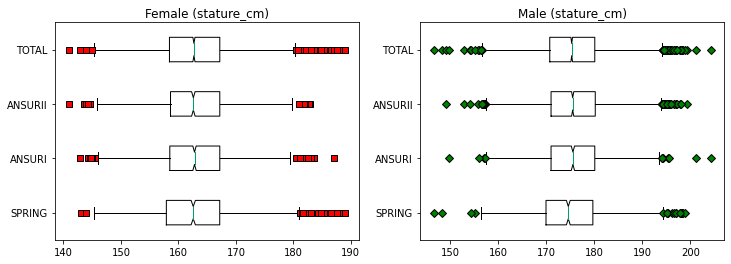

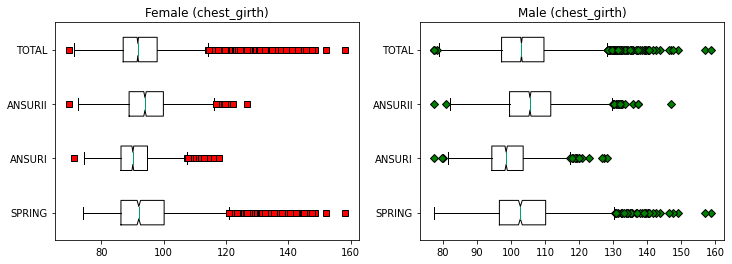

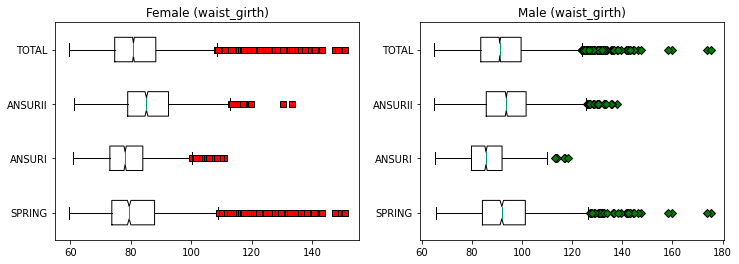

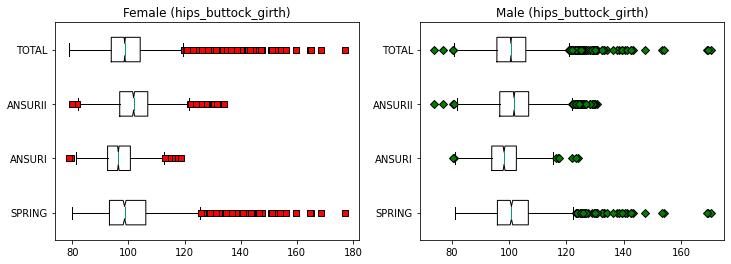

In [ ]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

# green_diamond = dict(markerfacecolor='g', marker='D')
# red_square = dict(markerfacecolor='r', marker='s')
gender_marker = {'female': dict(markerfacecolor='r', marker='s'),
                 'male': dict(markerfacecolor='g', marker='D')}

for meas in PERFIT_MEAS:   #MEASUREMENTS:  MAIN_MEAS

  plt.figure(figsize=(12,4))

  for g, gender in enumerate(GENDERS):
    plt.subplot(1, 2, g+1)

    ## Plot Boxplots
    plt.boxplot([eval(f'df_spring_{gender}[meas]'),
                 eval(f'df_ansuri_{gender}[meas]'),
                 eval(f'df_ansurii_{gender}[meas]'),
                 eval(f'df[df["gender"] == gender][meas]')
                ],
                labels=['SPRING', 'ANSURI', 'ANSURII', 'TOTAL'], notch=True, flierprops=eval(f'gender_marker["{gender}"]'), vert=False)

    plt.title(f"{gender.capitalize()} ({meas})")

  plt.show()

## Save dataframes to csv

In [ ]:
# Save datafreames to csv
df.to_csv(f"{SAVE_DIR}/SPRING_ANSURI_ANSURII_2023.csv", index=False)

# Clustering

In [ ]:
#Load DataFrame
df = pd.read_csv(f"{SAVE_DIR}/SPRING_ANSURI_ANSURII_2023.csv", encoding = file_encoding)
df.head()

,database,gender,weight_kg,stature_cm,neck_base_girth,chest_girth,waist_girth,hips_buttock_girth,shoulder_girth,thigh_girth,...,forearm_girth,wrist_girth,shoulder_length,sleeveoutseam_length,forearm_length,crotchheight_length,waistback_length,thigh_length,chest_depth_length,head_girth
0,ANSURII,male,80.40,174.50,42.10,102.40,91.1,99.60,114.70,62.40,...,29.9,18.0,15.10,61.10,28.40,84.60,47.00,44.3,24.80,57.60
1,ANSURI,female,65.70,154.70,35.00,99.20,83.3,100.10,103.30,62.30,...,26.5,15.2,14.50,52.20,23.00,71.30,34.30,37.2,26.30,55.80
2,ANSURII,female,66.30,160.30,38.20,98.20,88.0,99.00,103.40,57.70,...,24.9,16.6,14.30,53.20,23.60,74.00,41.20,35.1,26.50,55.40
3,SPRING,female,75.07,166.91,36.48,92.09,82.4,108.68,99.44,67.75,...,26.9,14.7,12.55,54.96,23.57,77.92,43.73,38.3,24.48,57.51
4,ANSURI,male,84.20,186.90,43.40,98.60,83.8,103.50,118.80,63.50,...,33.5,18.2,15.00,63.50,27.80,90.90,44.30,44.3,24.40,55.60


In [ ]:
df_female = df[df["gender"] == "female"][PERFIT_MEAS]  #PERFIT_MEAS  MAIN_MEAS
np_df_female = np.array(df_female)
df_male = df[df["gender"] == "male"][PERFIT_MEAS]   #PERFIT_MEAS  MAIN_MEAS
np_df_male = np.array(df_male)

In [ ]:
from sklearn.preprocessing import StandardScaler

def get_np_df_scaled(np_df):

  scaler = StandardScaler()
  scaler.fit(np_df)
  StandardScaler(copy=True, with_mean=True, with_std=True)

  return scaler.transform(np_df), scaler

In [ ]:
from sklearn.cluster import KMeans

def get_model_fit(np_df_scaled, NUM_CLUST):

  model = KMeans(n_clusters=NUM_CLUST, random_state=42)
  model.fit(np_df_scaled)

  return model

In [ ]:
##
from collections import Counter

dict_labels = dict()

for gender in GENDERS:

    np_df = eval(f'np_df_{gender}')
    np_df_scaled, scaler = get_np_df_scaled(np_df)
    model = get_model_fit(np_df_scaled, NUM_CLUST)

    ##X_compressed = km.cluster_centers_[km.labels_]
    labels = model.labels_
    centroids = scaler.inverse_transform(model.cluster_centers_).round(1)

    ## Create and save labeled gender DF
    dataset = pd.DataFrame(centroids, columns=MEAS)
    dict_labels[gender] = Counter(labels)
    dataset["group_label"] = [key for key in Counter(labels).keys()]
    dataset["total_per_label"] = [val for key, val in Counter(labels).items()]
    dataset = dataset.sort_values(by=PERFIT_MEAS[0]).reset_index(drop=True)
    # Save dataframes to csv
    dataset.to_csv(f"{SAVE_DIR}/Clusters{NUM_CLUST}_measurements{len(MEAS)}_mean_{gender}_2023.csv", index=False)

    ## Add labels to DataFrames and save*
    eval(f'df_{gender}')["label"] = labels



[0 7 2 ... 0 4 5]
[1 7 3 ... 6 2 6]


In [ ]:
print(dict_labels)
print([key for key in Counter(labels).keys()])
print([val for key, val in Counter(labels).items()])
print(centroids)

{'female': Counter({0: 948, 5: 877, 7: 871, 3: 793, 8: 530, 2: 510, 4: 484, 6: 460, 9: 208, 1: 44}), 'male': Counter({2: 1213, 1: 1143, 3: 857, 7: 773, 8: 771, 5: 739, 6: 691, 4: 686, 9: 450, 0: 50})}
[1, 7, 3, 8, 2, 4, 6, 5, 9, 0]
[1143, 773, 857, 771, 1213, 686, 691, 739, 450, 50]
[[148.2 182.8 135.7 136.7 134. ]
 [ 76.  174.1  99.   85.6  97.3]
 [ 86.7 175.6 106.5  95.5 103.2]
 [ 64.  167.6  92.2  78.   90.6]
 [ 69.9 178.9  93.3  78.9  92.9]
 [ 95.2 172.1 113.9 105.  108. ]
 [ 99.3 184.2 111.3 101.2 108.3]
 [ 84.4 183.9 101.7  88.4 100.6]
 [ 77.4 166.6 103.1  92.   99.2]
 [113.4 180.6 120.9 114.4 115.9]]


In [ ]:
df_aux = df_male.groupby("label").agg(['min', 'mean', 'median', 'max']).round(1)
df_aux = df_aux.sort_values(by=[(PERFIT_MEAS[0], 'mean')]).reset_index(drop=True)

In [ ]:
df_aux2 = df_male.query('label == 0')[MEAS[0]].round(1)

def nQuantiles(df_col, n):

  return np.quantile(df_col, np.linspace(0, 1, n))


for gender in GENDERS:
  for quant in QUANTS:

    np_quant = np.empty([NUM_CLUST, len(MEAS)])

    for i, lab in enumerate(dict_labels[gender].keys()):
      for j, meas in enumerate(MEAS):
        df_aux3 = eval(f'df_{gender}').query(f'label == {lab}')[meas]

        np_aux = np.quantile(df_aux3, quant)
        np_quant[i, j] = np_aux

    df_quant = pd.DataFrame(np_quant, columns=MEAS).round(1)
    df_quant  = df_quant.sort_values(by=PERFIT_MEAS[0]).reset_index(drop=True)

    # Save dataframes to csv
    df_quant.to_csv(f"{SAVE_DIR}/Clusters{NUM_CLUST}_measurements{len(MEAS)}_quant{quant}_{gender}_2023.csv", index=False)


# Analizing Clusters

### Plot clusters

In [ ]:
## Plot clusters/quantiles
df_quant1 = list()
df_quant2 = list()
df_quant3 = list()

df_total = pd.read_csv(f"{SAVE_DIR}/SPRING_ANSURI_ANSURII_2023.csv",
                          encoding = file_encoding, converters={'ID': str})

for gender in GENDERS:

  df_quant1.append(pd.read_csv(f"{SAVE_DIR}/Clusters{NUM_CLUST}_measurements{len(MEAS)}_quant{QUANTS[0]}_{gender}_2023.csv",
                          encoding = file_encoding, converters={'ID': str}))

  df_quant2.append(pd.read_csv(f"{SAVE_DIR}/Clusters{NUM_CLUST}_measurements{len(MEAS)}_quant{QUANTS[1]}_{gender}_2023.csv",
                          encoding = file_encoding, converters={'ID': str}))

  df_quant3.append(pd.read_csv(f"{SAVE_DIR}/Clusters{NUM_CLUST}_measurements{len(MEAS)}_quant{QUANTS[2]}_{gender}_2023.csv",
                          encoding = file_encoding, converters={'ID': str}))


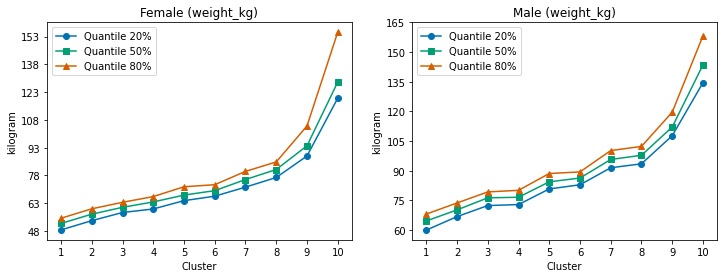

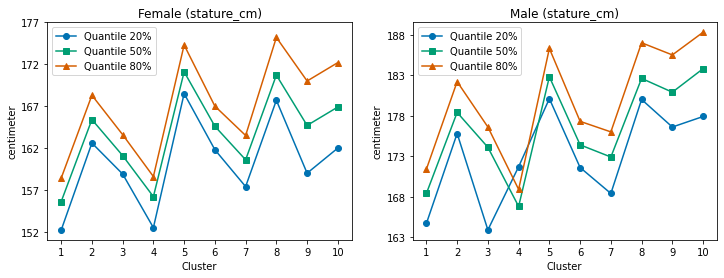

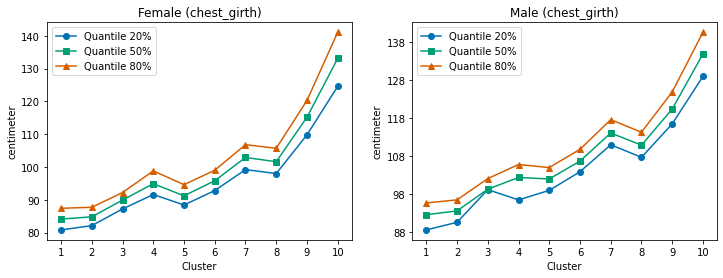

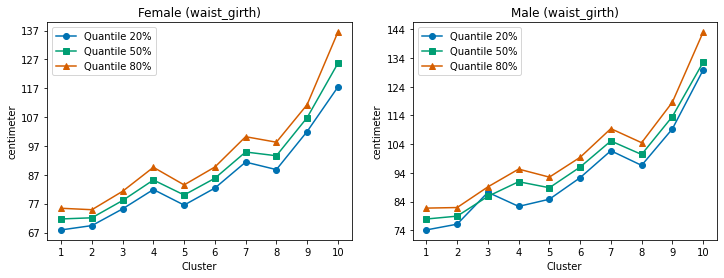

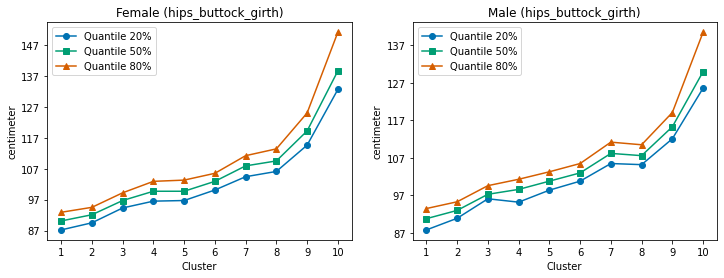

In [ ]:
for meas in PERFIT_MEAS:   #MEASUREMENTS:

  plt.figure(figsize=(12,4))

  for g, gender in enumerate(GENDERS):

    plt.subplot(1, 2, g+1)

    plt.plot(df_quant1[g][meas], '-o')
    plt.plot(df_quant2[g][meas], '-s')
    plt.plot(df_quant3[g][meas], '-^')

    if meas == "weight_kg":
      plt.ylabel("kilogram")
      plt.yticks(np.arange(int(df_quant1[g][meas].min()), int(df_quant3[g][meas].max())+10, 15.0))
    elif meas == "stature_cm":
      plt.ylabel("centimeter")
      plt.yticks(np.arange(int(df_quant1[g][meas].min()), int(df_quant3[g][meas].max())+5, 5.0))
    else:
      plt.ylabel("centimeter")
      plt.yticks(np.arange(int(df_quant1[g][meas].min()), int(df_quant3[g][meas].max())+5, 10.0))




    plt.xlabel("Cluster")
    plt.title(f"{gender.capitalize()} ({meas})")
    plt.xticks(range(NUM_CLUST), [i + 1 for i in range(NUM_CLUST)])
    plt.legend([f'Quantile {int(QUANTS[i]*100)}%' for i in range(len(QUANTS))])

  plt.savefig(f"{SAVE_DIR}/clusters_{meas}_2023.png")
  plt.show()

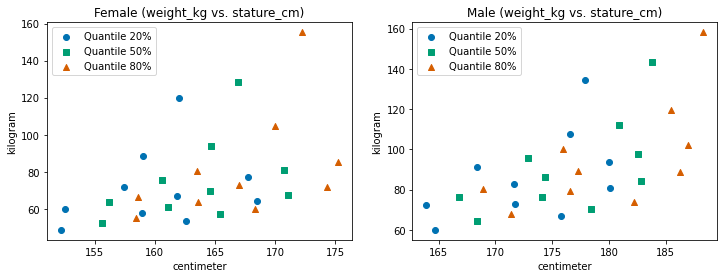

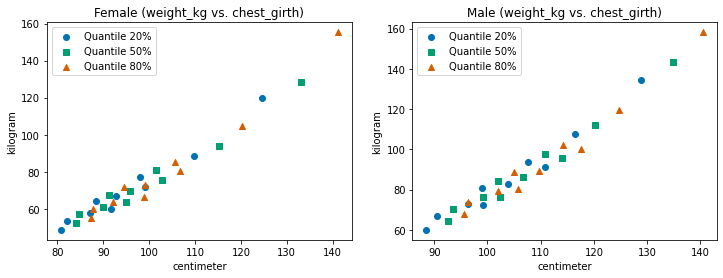

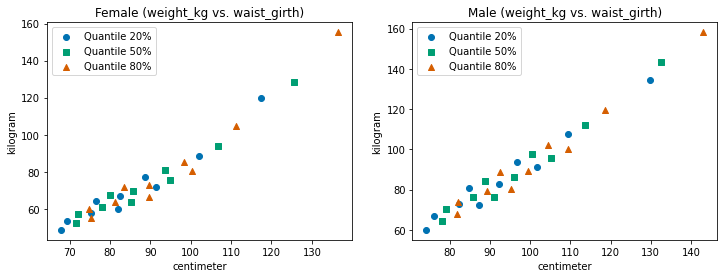

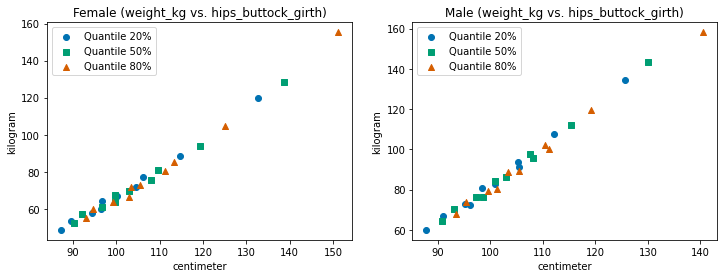

In [ ]:
# import seaborn as sns

for meas in PERFIT_MEAS[1:]:   #MEASUREMENTS:

  plt.figure(figsize=(12,4))

  for g, gender in enumerate(GENDERS):

    plt.subplot(1, 2, g+1)

    plt.scatter(y=df_quant1[g]["weight_kg"], x=df_quant1[g][meas], marker='o')
    plt.scatter(y=df_quant2[g]["weight_kg"], x=df_quant2[g][meas], marker='s')
    plt.scatter(y=df_quant3[g]["weight_kg"], x=df_quant3[g][meas], marker='^')

    plt.ylabel("kilogram")
    plt.xlabel("centimeter")
    plt.title(f"{gender.capitalize()} (weight_kg vs. {meas})")
    # plt.xticks(range(NUM_CLUST), [i + 1 for i in range(NUM_CLUST)])
    plt.legend([f'Quantile {int(QUANTS[i]*100)}%' for i in range(len(QUANTS))])

  plt.show()

In [ ]:
# COLORS = ['r', 'g']
# MARKERS = ['s', 'D']
# SAMPLE_SIZE = 5000

# for meas in PERFIT_MEAS[1:]:   #MEASUREMENTS:

#   plt.figure(figsize=(12,4))

#   for g, gender in enumerate(GENDERS):

#     plt.subplot(1, 2, g+1)

#     plt.scatter(y=df_total[df_total['gender'] == f"{gender}"]["weight_kg"], #.sample(n = SAMPLE_SIZE)  .sample(frac = 1.0)
#                 x=df_total[df_total['gender'] == f"{gender}"][meas],  #.sample(n = SAMPLE_SIZE)
#                 marker=MARKERS[g], color=COLORS[g])

#     plt.ylabel("kilogram")
#     plt.xlabel("centimeter")
#     plt.title(f"{gender.capitalize()} - TOTAL (weight_kg vs. {meas})")

#   plt.show()

### Evaluate the accuracy of the clustering

In [ ]:
# EVALUATE THE ACCURACY OF THECLUSTERING SYSTEM
SAMPLE_SIZE = 2000
np.random.seed(123)
subclust= ['a', 'b', 'c']
cluster_values = list()

def find_cluster_mprd(g, meas):

  min_dist = np.inf
  cluster = str()
  np_meas = np.array(meas)

  for i in range(3):
    for lab, row in eval(f'df_quant{i+1}[{g}]').iterrows():

      cluster_meas = list(row)
      dist = calc_dist(np_meas, np.array(cluster_meas))

      if dist < min_dist:
        min_dist = dist
        cluster = f'{lab + 1}{subclust[i]}'
        cluster_values = cluster_meas

  ## Mean percent relative deviation
  mprd = mean_pct_rel_dev(np_meas, np.array(cluster_values))

  return cluster, mprd


def calc_dist(np_meas, np_cluster_meas):

  return np.linalg.norm(np_meas - np_cluster_meas)


def mean_pct_rel_dev(np_meas, np_cluster_values):

  return (np.absolute( (np_meas - np_cluster_values) / np_cluster_values).sum() / np_meas.shape * 100).round(1)[0]

In [ ]:
df_total_samples = list()

for g, gender in enumerate(GENDERS):
  df_total_samples.append(df_total[df_total['gender'] == gender].sample(n = SAMPLE_SIZE)[PERFIT_MEAS])

clusters = [[], []]
mean_perc_rel_dev = [[], []]

for g, samples in enumerate(df_total_samples):
  for lab, row in samples.iterrows():

    clust, mprd = find_cluster_mprd(g, list(row))
    clusters[g].append(clust)
    mean_perc_rel_dev[g].append(mprd)

In [ ]:
# Create DataFrame
cluster_id = [f'{i + 1}{j}' for i in range(10) for j in subclust]

df_clusters = pd.DataFrame(columns=['order_id', 'cluster','mprd', 'gender'])

df_clusters['cluster'] = clusters[0] + clusters[1]
df_clusters['mprd'] = mean_perc_rel_dev[0] + mean_perc_rel_dev[1]
df_clusters['gender'] = ['female'] * SAMPLE_SIZE + ['male'] * SAMPLE_SIZE

order_id = [cluster_id.index(x) for x in df_clusters['cluster']]
df_clusters['order_id'] = order_id

df_clusters = df_clusters.sort_values(by = 'order_id').drop('order_id', axis=1)
# print(df_clusters)

In [ ]:
df_mean_mprd = list()

for g, gender in enumerate(GENDERS):

  df_aux = df_clusters.query(f'gender == "{gender}"')
  df_aux = pd.DataFrame({'mean_mprd' : df_aux.groupby("cluster")['mprd'].mean(),
                         'count_clusters' : df_aux.groupby("cluster")['cluster'].count()}).reset_index().sort_values(by = 'cluster')

  order_id = [cluster_id.index(x) for x in df_aux['cluster']]
  df_aux['order_id'] = order_id

  df_aux = df_aux.sort_values(by = 'order_id').drop('order_id', axis=1).set_index('cluster')

  df_mean_mprd.append(df_aux)

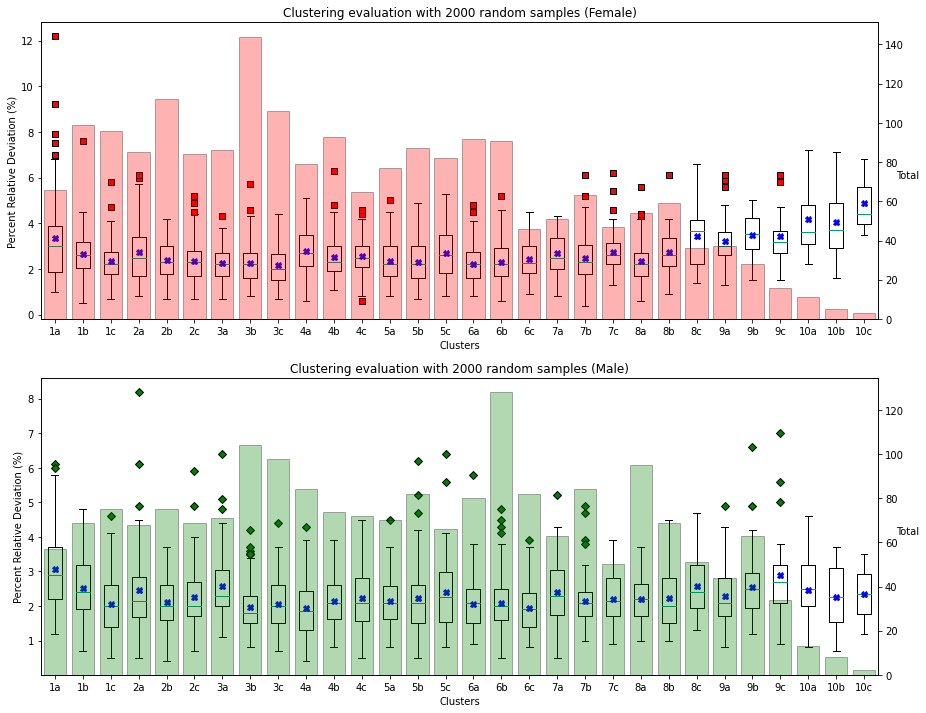

In [ ]:
COLORS = ['r', 'g']
MARKERS = ['s', 'D']

# plt.hist(df_clusters[])
gender_marker2 = {'female': dict(markerfacecolor='r', marker='s'),
                 'male': dict(markerfacecolor='g', marker='D')}

# https://matplotlib.org/stable/gallery/statistics/boxplot.html
meanlineprops = dict(linestyle='-', linewidth=2.0, color='b')
meanpointprops = dict(marker='X', markeredgecolor='b', markerfacecolor='b')

fig, ax = plt.subplots(2, 1, figsize=(15, 12))

for g, gender in enumerate(GENDERS):

  df_aux = df_clusters.query(f'gender == "{gender}"')

  ax[g].boxplot([[mprd for mprd in df_aux.query(f'cluster == "{cl}"')['mprd']] for cl in cluster_id],
            labels=cluster_id, notch=False, flierprops=eval(f'gender_marker2["{gender}"]'), vert=True,
            showmeans=True, meanprops=meanpointprops, meanline=False)
  ax[g].set_xlabel("Clusters")
  ax[g].set_ylabel("Percent Relative Deviation (%)")
  ax[g].set_title(f"Clustering evaluation with {SAMPLE_SIZE} random samples ({gender.capitalize()})")
  # ax[g].yaxis.set_label_position('right')
  # ax[g].yaxis.set_ticks_position('right')
  # ax[g].legend()

  ax2 = ax[g].twinx()

  # ax[g].scatter(plt.xticks()[0], df_mean_mprd[g]["mean_mprd"], color='b', marker='x')

  ax2.bar(plt.xticks()[0], df_mean_mprd[g]["count_clusters"], align='center', edgecolor="black", alpha=0.3,
          color=COLORS[g])   #, label="Total per cluster"
  ax2.set_ylabel("Total", rotation=0)
  # ax2.yaxis.set_label_position('left')
  # ax2.yaxis.set_ticks_position('left')
  # ax2.legend()

fig.savefig(f"{SAVE_DIR}/clusters_sample{SAMPLE_SIZE}_mprd_2023.png")
plt.show()

Plottting clusters (scatter plots)

In [ ]:
clusters = []

for lab, row in df_total.iterrows():
    clust, _ = find_cluster_mprd(GENDERS.index(row['gender']), list(row[PERFIT_MEAS]))
    clusters.append(clust[:-1])


aux_cols = ['gender'] + PERFIT_MEAS
df_total_perfit = df_total[aux_cols]
df_total_perfit['cluster'] = clusters

df_total_perfit.to_csv(f"{SAVE_DIR}/SPRING_ANSURI_ANSURII_perfit_{NUM_CLUST}clusters_2023.csv", index=False)

<ipython-input-53-402e0c467d7d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_perfit['cluster'] = clusters


In [ ]:
df_total_perfit = pd.read_csv(f"{SAVE_DIR}/SPRING_ANSURI_ANSURII_perfit_{NUM_CLUST}clusters_2023.csv",
                              encoding = file_encoding, converters={'ID': str})

# df_total_perfit['cluster'].value_counts()

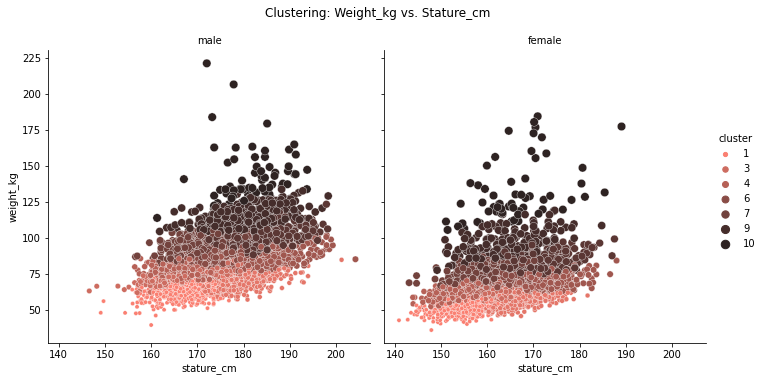

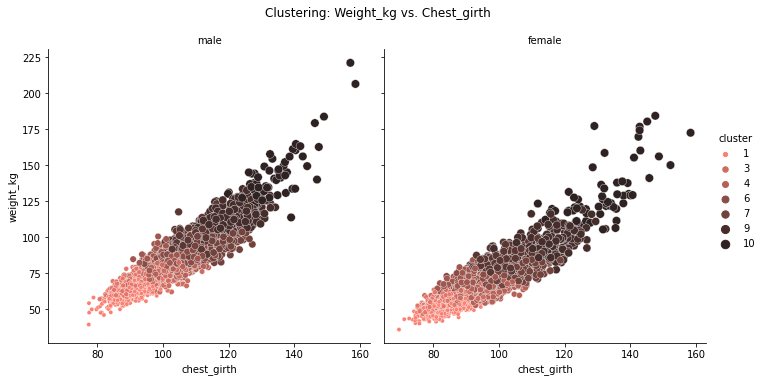

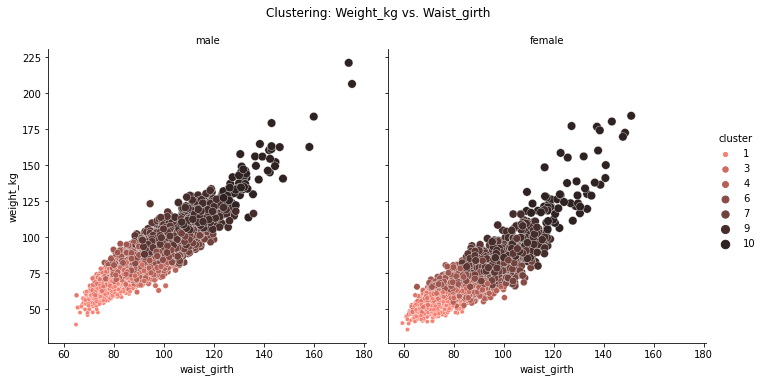

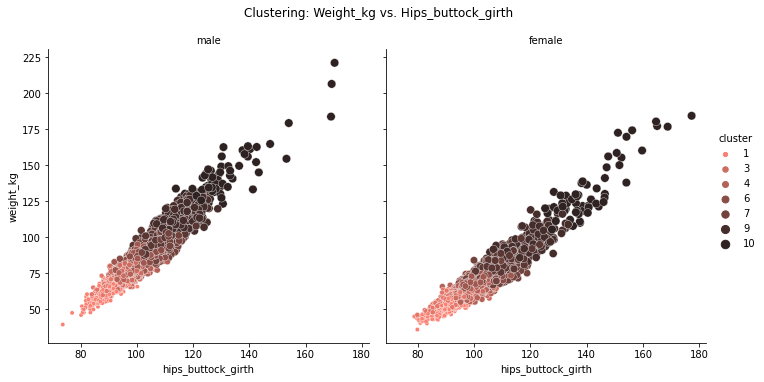

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.style.use("default")
# sns.set_palette("RdBu_r")
# sns.color_palette("RdBu", NUM_CLUST)
# sns.color_palette("dark:salmon_r", as_cmap=True)


# custom_palette = ['#FBB4AE', '#B3CDE3', '#CCEBC5',
#                   '#DECBE4', '#FED9A6', '#FFFFCC',
#                   '#E5D8BD', '#FDDAEC', '#F2F2F2',
#                   '#000000']

# sns.set_palette(custom_palette)

# cluster_id_rev = cluster_id[::-1]

for meas in PERFIT_MEAS[1:]:

  ax = sns.relplot(x=meas, y="weight_kg", data=df_total_perfit, kind="scatter",
              col="gender",
              size="cluster",
              size_order=cluster_id,   #cluster_id_rev
              hue="cluster",
              hue_order=cluster_id,
              palette="dark:salmon_r")          #"RdBu")  "crest"  "rocket_r" "dark:salmon_r"

  # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), ncol=2)
  ax.fig.suptitle(f'Clustering: Weight_kg vs. {meas.capitalize()}', y=1.05)
  ax.set_titles('{col_name}')

plt.show()

https://www.reneshbedre.com/blog/kmeans-clustering-python.html#:~:text=The%20centroid%20of%20a%20cluster,the%20centroids%20of%20that%20cluster.

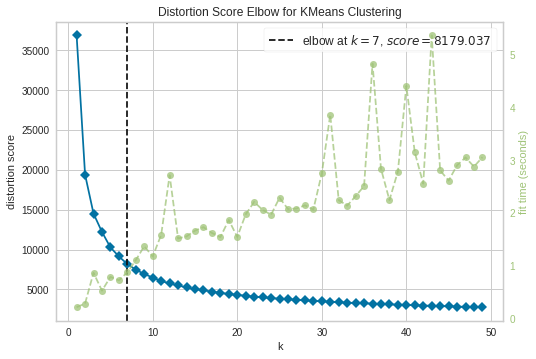

In [ ]:
# from yellowbrick.cluster import KElbowVisualizer
# model = KMeans()
# visualizer = KElbowVisualizer(model, k=(1,50)).fit(np_df_scaled)
# visualizer.show()

# t-SNE in sklearn

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


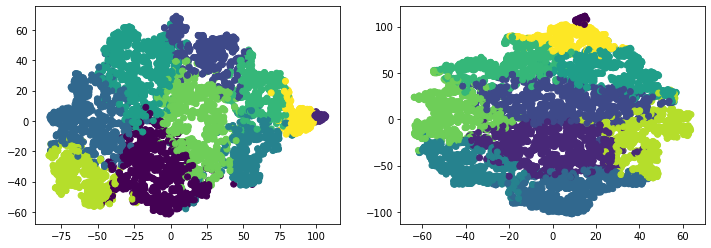

In [ ]:
from sklearn.manifold import TSNE

plt.figure(figsize=(12,4))

for g, gender in enumerate(GENDERS):

    plt.subplot(1, 2, g+1)

    np_df = eval(f'np_df_{gender}')
    np_df_scaled, scaler = get_np_df_scaled(np_df)

    model = TSNE(learning_rate=200)
    transformed = model.fit_transform(np_df_scaled)

    xs = transformed[:,0]
    ys = transformed[:,1]

    lb = eval(f'df_{gender}')["label"]
    plt.scatter(xs, ys, c=lb)

plt.show()

In [ ]:
df_total = pd.read_csv(f"{SAVE_DIR}/SPRING_ANSURI_ANSURII_2023.csv",
                          encoding = file_encoding, converters={'ID': str})

df_total

,database,gender,weight_kg,stature_cm,neck_base_girth,chest_girth,waist_girth,hips_buttock_girth,shoulder_girth,thigh_girth,...,forearm_girth,wrist_girth,shoulder_length,sleeveoutseam_length,forearm_length,crotchheight_length,waistback_length,thigh_length,chest_depth_length,head_girth
0,ANSURII,male,80.40,174.50,42.10,102.40,91.10,99.60,114.70,62.40,...,29.90,18.00,15.10,61.10,28.40,84.60,47.00,44.30,24.80,57.60
1,ANSURI,female,65.70,154.70,35.00,99.20,83.30,100.10,103.30,62.30,...,26.50,15.20,14.50,52.20,23.00,71.30,34.30,37.20,26.30,55.80
2,ANSURII,female,66.30,160.30,38.20,98.20,88.00,99.00,103.40,57.70,...,24.90,16.60,14.30,53.20,23.60,74.00,41.20,35.10,26.50,55.40
3,SPRING,female,75.07,166.91,36.48,92.09,82.40,108.68,99.44,67.75,...,26.90,14.70,12.55,54.96,23.57,77.92,43.73,38.30,24.48,57.51
4,ANSURI,male,84.20,186.90,43.40,98.60,83.80,103.50,118.80,63.50,...,33.50,18.20,15.00,63.50,27.80,90.90,44.30,44.30,24.40,55.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13093,SPRING,male,79.05,175.14,40.77,101.20,88.56,100.95,115.62,61.66,...,29.47,17.82,16.02,56.07,27.53,78.61,49.39,40.33,23.11,58.36
13094,ANSURII,male,101.70,186.50,46.10,114.30,96.20,108.20,122.00,68.50,...,35.00,18.90,14.40,61.80,27.90,89.50,47.70,43.10,27.80,56.30
13095,ANSURII,male,89.80,180.00,47.20,111.70,100.10,104.10,120.80,61.40,...,32.20,17.50,14.20,57.40,25.60,83.00,51.20,41.20,27.30,57.70
13096,ANSURII,male,98.50,185.60,43.80,110.90,96.40,109.70,125.40,66.10,...,33.10,18.20,15.10,62.40,28.10,88.80,48.10,41.90,26.00,59.70
